<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/ThermodynamicCycles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Thermodynamic Cycles
#@markdown A thermodynamic cycle consists of a linked sequence of thermodynamic processes that involve transfer of heat and work into and out of the system, while varying pressure, temperature, and other state variables within the system, and that eventually returns the system to its initial state.[1] In the process of passing through a cycle, the working fluid (system) may convert heat from a warm source into useful work, and dispose of the remaining heat to a cold sink, thereby acting as a heat engine. Conversely, the cycle may be reversed and use work to move heat from a cold source and transfer it to a warm sink thereby acting as a heat pump. At every point in the cycle, the system is in thermodynamic equilibrium, so the cycle is reversible (its entropy change is zero, as entropy is a state function).
%%capture
!pip install neqsim

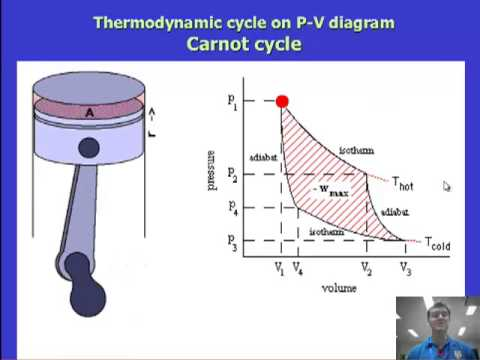

In [0]:
#@title  Introduction to Thermodynamic Cycles
#@markdown How a series of thermodynamic changes can produce a cyclical process as seen in the combustion engine.
from IPython.display import YouTubeVideo
YouTubeVideo('OmhXb-miAhw', width=600, height=400)


# The Rankin Cycle
The Rankine cycle is a model used to predict the performance of steam turbine systems. It was also used to study the performance of reciprocating steam engines. The Rankine cycle is an idealized thermodynamic cycle of a heat engine that converts heat into mechanical work while undergoing phase change. It is an idealized cycle in which friction losses in each of the four components are neglected. The heat is supplied externally to a closed loop, which usually uses water as the working fluid. It is named after William John Macquorn Rankine, a Scottish polymath and Glasgow University professor.

In [0]:
import neqsim
from neqsim.thermo.thermoTools import *
from neqsim.process import stream,clearProcess,runProcess, pump, heater, cooler, expander
fluid_1 = fluid("cpa")
fluid_1.addComponent("water", 1.0)

fluid_1.setPressure(0.05, "bara")
fluid_1.setTotalFlowRate(1000.0, "kg/hr")

clearProcess()
stream_1 = stream(fluid_1)
stream_1.setSpecification("bubP");
stream_1.run();

pump_1 = pump(stream_1, 50.0)

heater_1 = cooler(pump_1.getOutStream())
heater_1.setSpecification("out stream");

stream_2 = stream(heater_1.getOutStream())
#stream_2.setSpecification("dewP");
stream_2.getThermoSystem().setTemperature(535.49)
stream_2.getThermoSystem().setPressure(50.0)

expander_1 = expander(stream_2, 0.05)
runProcess()

print("low pressure ", stream_1.getPressure(), " bara")
print("low temperature ", (stream_1.getTemperature()-273.15), " C")

print("pump power ", pump_1.getPower(), " W")
print("heater duty ", heater_1.getDuty(), " W")
print("high pressure ", stream_2.getPressure(), " bara")
print("high temperature ", (stream_2.getTemperature()-273.15), " C")

print("expander power ", expander_1.getPower(), " W")

dewt(stream_2.getThermoSystem())

low pressure  0.05  bara
low temperature  37.424466596529896  C
pump power  1429.2425561369164  W
heater duty  -0.5117018767050467  W
high pressure  50.0  bara
high temperature  262.34000000000003  C
expander power  -330958.4563702864  W


535.4902930730977

# Carnot Cycle
The Carnot cycle is a theoretical ideal thermodynamic cycle proposed by French physicist Sadi Carnot in 1824 and expanded upon by others in the 1830s and 1840s. It provides an upper limit on the efficiency that any classical thermodynamic engine can achieve during the conversion of heat into work, or conversely, the efficiency of a refrigeration system in creating a temperature difference by the application of work to the system. It is not an actual thermodynamic cycle but is a theoretical construct.

https://en.wikipedia.org/wiki/Carnot_cycle

The Carnot efficiency is defined to be:

$\eta=\frac{W}{Q_H}=\frac{Q_H-Q_C}{Q_H}=1-\frac{T_C}{T_H}$

In [2]:
T_hot = 100 # C
T_cold = 20 # C

efficiency = 1.0-T_cold/T_hot

print("Carnot efficiency: ", efficiency)

Carnot efficiency:  0.8


In [0]:
import neqsim
from neqsim.thermo.thermoTools import *
from neqsim.process import stream,clearProcess,runProcess, pump, heater, cooler, expander, valve, compressor, heater

# The starting point is a fluid at termodynamic equilibrium
fluid_1 = fluid("srk")
fluid_1.addComponent("methane", 1.0, "kg/sec")
TPflash(fluid_1)
fluid_1.initProperties()
enthalpy_1 = fluid_1.getEnthalpy("kJ/kg")
entropy_1 = fluid_1.getEntropy("kJ/kgK")
volume = fluid_1.getVolume("m3/kg")


# The Carnot cycle when acting as a heat engine consists of the following steps:¨
# Isothermal Expansion. Heat is transferred reversibly from high temperature reservoir at constant temperature TH (isothermal heat addition or absorption). 



In [0]:
import neqsim
from neqsim.thermo.thermoTools import *
from neqsim.process import stream,clearProcess,runProcess, pump, heater, cooler, expander, valve, compressor, heater
fluid_1 = fluid("srk")
fluid_1.addComponent("propane", 1.0)

fluid_1.setPressure(15.0, "bara")
fluid_1.setTemperature(30.0, "C")
fluid_1.setTotalFlowRate(1000.0, "kg/hr")

clearProcess()
stream_1 = stream(fluid_1)
stream_1.setSpecification("bubT");
stream_1.run();

JTvalve = valve(stream_1, 1.0)

cooler_1 = cooler(JTvalve.getOutStream())
cooler_1.setSpecification("out stream");

stream_2 = stream(cooler_1.getOutStream())
stream_2.setSpecification("dewT");
stream_2.getThermoSystem().setTemperature(273.15  - 30.0);
stream_2.run()

cooler_1.setOutStream(stream_2);
JTvalve.setOutletPressure(stream_2.getPressure());

compressor_1 = compressor(stream_2, 10.0);
compressor_1.setSpecification("out stream")
compressor_1.setOutletPressure(stream_1.getPressure())

heater = heater(compressor_1.getOutStream())
heater.setPressureDrop(0.07);
heater.setSpecification("out stream");
heater.setOutStream(stream_1);

runProcess()

print("compressor work ", compressor_1.getEnergy(), " W");
print("compressor isentropic ef ", compressor_1.getIsentropicEfficiency()*100.0, " %");
print("cooler duty ", cooler_1.getEnergyInput(), " W");
print("heater duty ", heater.getEnergyInput(), "W");


compressor work  24632.123659926747  W
compressor isentropic ef  100.0  %
cooler duty  72875.21619975152  W
heater duty  -97507.33985967825 W
